In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
%matplotlib inline

## 1. Introduction

Working on the Titanic Data Set, which is a sample of the passangers on aboard the ship 'Titanic' having various paramters like suvival, age, class etc...

We would analyse this data to see if any of the factors like class, sex, age led to the survival of the passanger, i.e.. on factors the survival rate depended.

I will pose my question once I have seen some data and can infer few things abount the data.

In [154]:
#Loading the csv data into the dataFrame.
titanic_df = pd.read_csv('titanic-data.csv')

In [155]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Questions for analysing the data

1. Which passangers were most likely to survive
2. How much role did social class play in the survival rate.
3. Which age group and Gender had better chance of survival.
4. Did passangers with high fare had higher survival rate ?

## 3. Data Wrangling

As per Kaggle Notes on the Titanic Data. For the survival column, 0 --> No (Did Not Survive) while 1 --> Yes( Did Survive)


In [156]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [157]:
len(titanic_df.index)

891

## 3.1 Missing Data

Age Data for some passangers is missing.
Would need to assign these missing values some value based on the Sex and Class of the passenger

In [158]:

titanic_df.groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [159]:
means = titanic_df.groupby(['Sex','Pclass'])['Age'].mean()

In [160]:
means['female'][1]

34.611764705882351

In [161]:
titanic_df.iloc[1]['Sex']

'female'

In [162]:
titanic_df.iloc[1]['Pclass']

1

In [163]:
#replacing null age with mean age based on Sex and Pclass
def mean_age(passanger):
    if pd.isnull(passanger['Age']):
        passanger['Age'] = means[passanger['Sex'],passanger['Pclass']]
    return passanger['Age']

In [164]:
titanic_test_df = titanic_df[titanic_df['Age'].isnull()].copy()

In [165]:
titanic_test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [166]:
titanic_test_df['Age'] = titanic_df.apply(mean_age,axis=1)

In [167]:
titanic_test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.740707,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,21.750000,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,26.507589,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.750000,0,0,330959,7.8792,NaN,Q


In [168]:
titanic_df['Age'] =titanic_df.apply(mean_age, axis=1)

In [169]:
titanic_df[titanic_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### We can now see that there are no empty data for the Age
Although there are still some missing data for Cabin, but we might not need that in our analysis based on the questions posed above. However, for furhter analysis we might need to fill those values as well

## 4. Analysing the Data

### 4.1 Analysing Ages vs Survivors

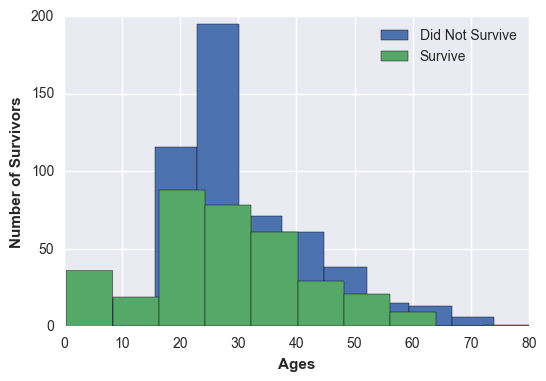

In [170]:
#Analysing number of survivors across different ages

did_not_survive = titanic_df[titanic_df['Survived'] == 0]
did_survive = titanic_df[titanic_df['Survived'] == 1]
plt.hist(did_not_survive['Age'],bins = 10,label = 'Did Not Survive')
plt.hist(did_survive['Age'],bins = 10,label = 'Survive')
plt.xlabel('Ages', fontweight='bold' )
plt.ylabel('Number of Survivors', fontweight='bold')
plt.legend(loc='upper right')
plt.show()

It looks like as the age went up the survival rate went down.

##### Analysing Surivial Rate by Age Group

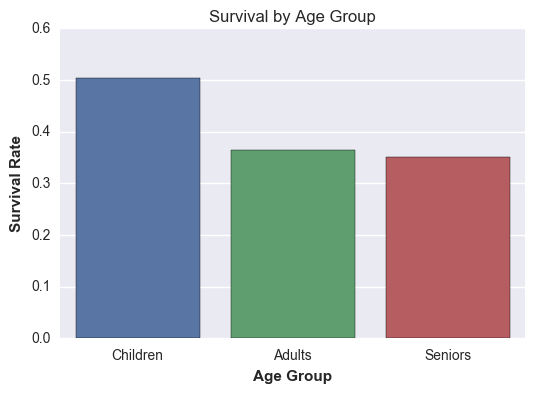

In [171]:
titanic_df['age_group'] = pd.cut(titanic_df['Age'],bins = [0,18,40,90], labels=['Children','Adults','Seniors'])
sns.barplot(x="age_group", y="Survived", data=titanic_df,ci=None)
plt.xlabel('Age Group', fontweight = 'bold')
plt.ylabel('Survival Rate', fontweight = 'bold')
plt.title('Survival by Age Group')


### 4.2 Analysing Passanger Gender vs Survival Rate

In [172]:
survival_sex = titanic_df.groupby(['Survived','Sex']).size().unstack('Survived')
survival_sex

Survived,0,1
Sex,,
female,81,233
male,468,109


In [173]:
survival_rate = survival_sex.divide(survival_sex.sum(axis=1),axis=0)*100
survival_rate

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


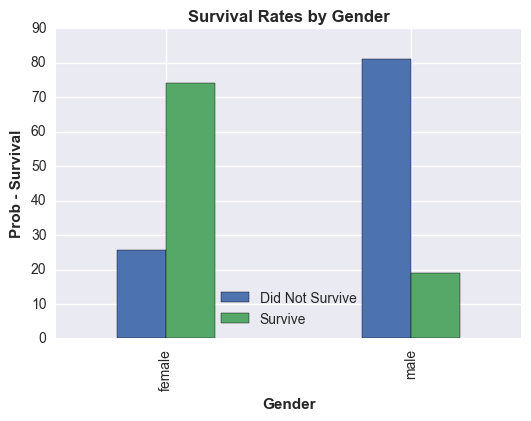

In [174]:
survival_rate.plot(kind = 'bar', width = 0.4)
#plt.legend(loc='lower center', shadow = True)
#l=plt.legend()
#l.get_texts()[0].set_text('Did Not Survive')
#l.get_texts()[1].set_text('Survive')
plt.legend(loc='lower center', labels=['Did Not Survive','Survive'])
plt.xlabel('Gender', fontweight = 'bold')
plt.ylabel('Prob - Survival', fontweight = 'bold')
plt.title('Survival Rates by Gender',fontweight = 'bold')

Females had much higher survival chances as compared to Male

### 4.3 Analysing Pclass vs Survival

In [175]:
#how many passangers survived per pclass
survival_by_pclass = titanic_df.groupby(['Survived','Pclass']).agg({'Survived':'count'})

In [176]:
survival_by_pclass_percent = survival_by_pclass.groupby(level=1).apply(lambda x: 100 * x/float(x.sum()))

In [177]:
survival_by_pclass_percent

Survived
Survived Pclass           
0        1       37.037037
         2       52.717391
         3       75.763747
1        1       62.962963
         2       47.282609
         3       24.236253

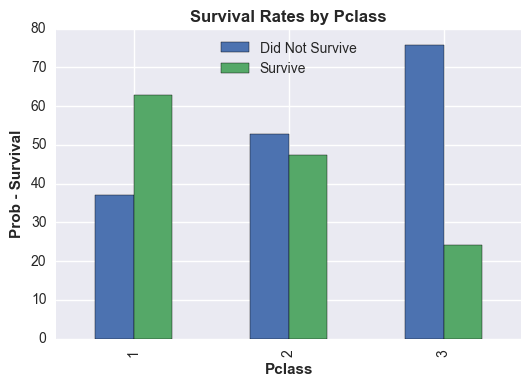

In [178]:
survival_by_pclass_percent.unstack('Survived').plot(kind='bar',stacked=False)
plt.legend(loc='upper center', labels=['Did Not Survive','Survive'])
plt.xlabel('Pclass', fontweight = 'bold')
plt.ylabel('Prob - Survival', fontweight = 'bold')
plt.title('Survival Rates by Pclass',fontweight = 'bold')

From the above plot we can see the percetage of survival was much higher in upper class compared to lower class

### 4.4 Analysing Fare vs Survival

In [179]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

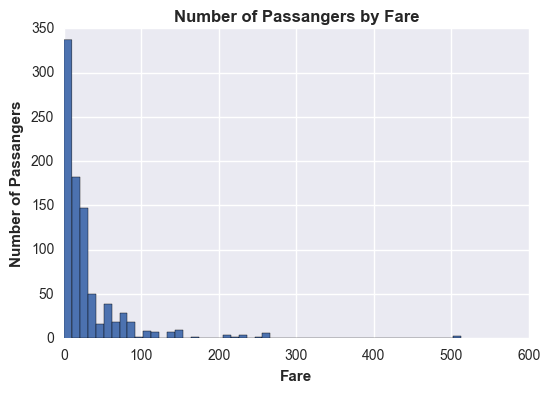

In [180]:
plt.hist(titanic_df['Fare'],bins = 50,label = 'Fares')
plt.xlabel('Fare', fontweight = 'bold')
plt.ylabel('Number of Passangers', fontweight = 'bold')
plt.title('Number of Passangers by Fare',fontweight = 'bold')

In [181]:
ranges = [0,50,100,150,200,250,300,350,400,450,500,550,600]

In [182]:
titanic_fare_range_df = titanic_df.groupby(pd.cut(titanic_df.Fare, ranges))

In [183]:
survived_data_df = titanic_df[titanic_df['Survived'] == 1]

In [184]:
titanic_fare_survive_range_df = survived_data_df.groupby(pd.cut(survived_data_df.Fare, ranges))

In [185]:
titanic_fare_survive_range_df.count().Fare

Fare
(0, 50]       232
(50, 100]      70
(100, 150]     19
(150, 200]      6
(200, 250]      7
(250, 300]      4
(300, 350]      0
(350, 400]      0
(400, 450]      0
(450, 500]      0
(500, 550]      3
(550, 600]      0
Name: Fare, dtype: int64

In [186]:
survival_by_fare = np.divide(titanic_fare_survive_range_df.count().Fare, titanic_fare_range_df.count().Fare)

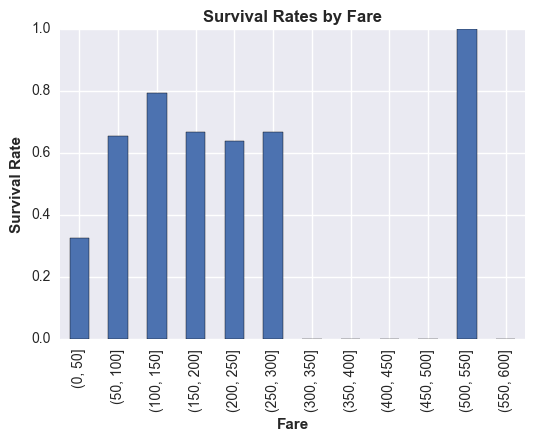

In [187]:
survival_by_fare.plot(kind='bar')
plt.xlabel('Fare', fontweight = 'bold')
plt.ylabel('Survival Rate', fontweight = 'bold')
plt.title('Survival Rates by Fare',fontweight = 'bold')

We can see that as the fare increased the survival rate also increased

## 5. Conclusion

From the above analysis we can see that, children of the age group 0-10 years had highest survival rate.
In face apart from the 0-10 age group, all other groups had better chances of dying than surviving.

For Sex, it is clear that Females had much higher survival rate than males.

For Class, Only the First class passangers had a higher survival rate as compared to death rate,
for classes second and third, the death rate was higher than survival rate.

When analysing the Fare we saw that passangers with higher fare had better survival rate as compared to lower fare ones, in fact the passangers with fares < 50 had the worst survival rate.

There few limitations in the dataset, such as missing cabing number. If we had that data we could have checked if cabin number(position) played any factor in the survival rate and if person with pclass as 2 or 3 but having closer cabin had better chances of survival.

As this is only a sample of data, if more data is available we can build on our hypothesis and draw more concrete conclusions.

## 6. References

1. Book - Python for Data Analysis - Wes McKinney
2. Pandas Docs - http://pandas.pydata.org/pandas-docs/stable/visualization.html